In [3]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X, y= make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

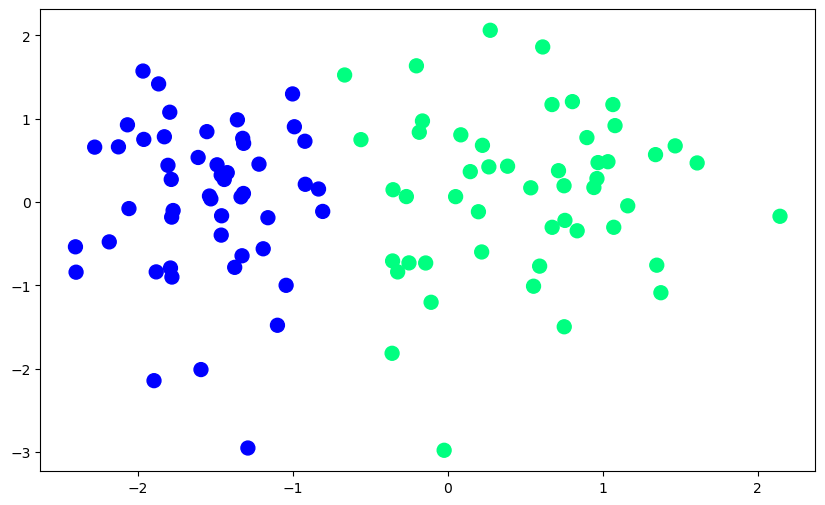

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
plt.show()

In [21]:
def step(z):
    if z >=0:
        return 1
    else:
        return 0

In [26]:
def perceptron(X, y):
    m = []
    b = []
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
    return m, b

In [27]:
m, b = perceptron(X, y)

In [28]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


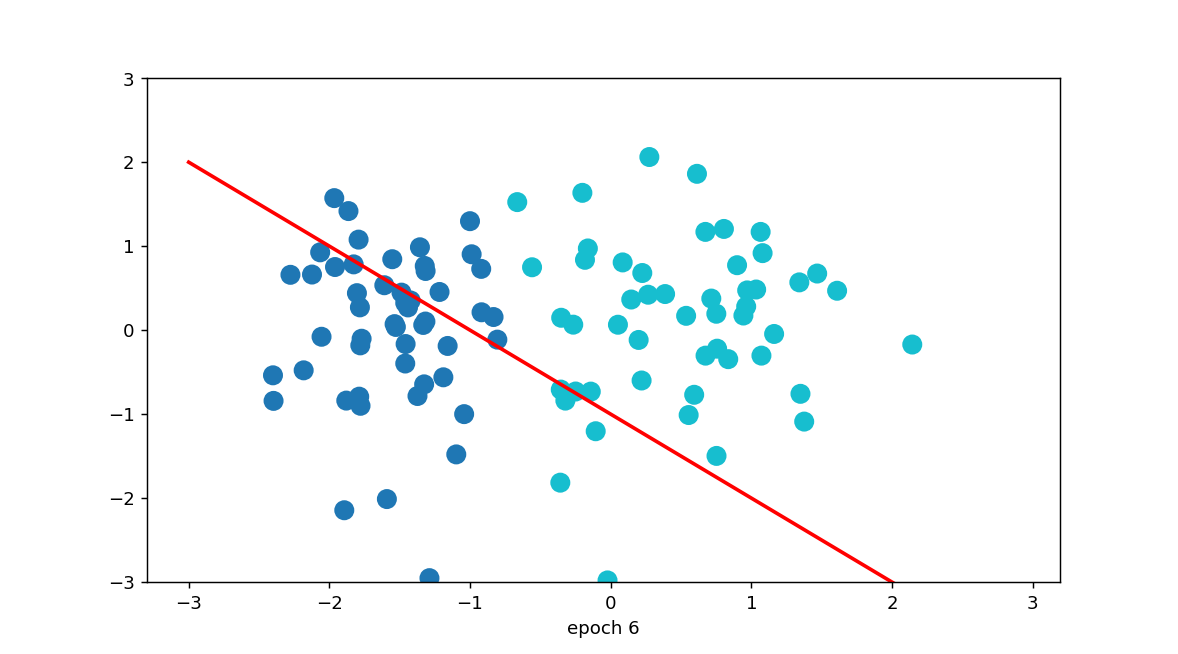

In [62]:
fig, ax = plt.subplots(figsize=(9, 5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0]+b[0]
ax.scatter(X[:,0], X[:, 1], c=y, cmap='tab10', s=100)
line, = ax.plot(x_i, x_i*m[0]+b[0], 'r-', linewidth=2)
plt.ylim(-3, 3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i]+b[i])
    ax.set_xlabel(label)
anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
writervideo = animation.FFMpegWriter(fps=30, bitrate=1000, codec='h264') 
anim.save('perceptron-trick.gif', writer=writervideo, dpi=300) 